# Algoritmos Concurrentes

## Problema

En este problema se trata de desarrollar una investigación empírica para comparar un algoritmo implementado de dos maneras.La pregunta de investigación es:
¿Cómo se compara el desempeño del algoritmo genético secuencial con el desempeño del algoritmo genético concurrente en la resolución del problema del vendedor viajero para 17 localidades en Costa Rica? 

## Hipótesis

Una de las hipótesis plantedas es que el algoritmo concurrente tendrá mejor desempeño. Para poder saber cuál algoritmo es más rápido hay que entender los conceptos de concurrencia y de secuencialidad y saber diferenciarlos y a partir de ahí, implementar y sacar las conclusiones y responder a la pregunta planteada.

### Algoritmos Secuenciales

La estructura secuencial es aquella en la que una acción (instrucción) sigue a otra en secuencia. Las tareas se suceden de tal modo que la salida de una es la entrada de la siguiente y así sucesivamente hasta el fin del proceso.(Colmenarez, 2011)


![Alg_Secuenciales](https://logicadeprogramacion.neocities.org/sitioweb/diagrama1.gif)
**Imagen brindada por:** https://logicadeprogramacion.neocities.org/sitioweb/algortimos-secuenciales.html

### Algoritmos Concurrentes 

En ciencias de la computación, concurrencia se refiere a la habilidad de distintas partes de un programa, algoritmo, o problema de ser ejecutado en desorden o en orden parcial, sin afectar el resultado final. Los cálculos (operaciones) pueden ser ejecutados en múltiples procesadores, o ejecutados en procesadores separados físicamente o virtualmente en distintos hilos de ejecución.(Rance, 2020)

![Filo_Comiendo](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/An_illustration_of_the_dining_philosophers_problem.png/200px-An_illustration_of_the_dining_philosophers_problem.png)
**Imagen brindada por:** https://es.wikipedia.org/wiki/Concurrencia_(inform%C3%A1tica)


A grandes rasgos se puede decir, como primera hipóteisis, que los algoritmos concurrentes van a tener mucho más desempeño que los algoritmos secuenciales debido a su característica de múltiples procesadores para llegar a una solución.

Los algoritmos genéticos tienen muchos parámetros de entrada que requieren de estar bien equilibrados o balanceados para un buen funcionamiento, o un funcionamiento idóneo en funcion de una población inicial y que pueden llegar a afectar consideráblemente el rendimiento del algoritmo.

Se plantea como segunda hipótesis que con algoritmos genéticos concurrentes se podrán hacer pruebas con mayores iteraciones, con mayores poblaciones y con porcentajes de mutación elevados sin que se afecte mucho el rendimiento o el tiempo de ejecución, como sí sucedería con la versión secuencial. 

## Metodología

El proceso a seguir para lo que es la experimentación y sucesivamente lograr el análisis de datos consistirá en una serie de pruebas y graficaciones que serán explicadas posteriormente. El lenguaje de programación sera *Python 3*, las pruebas del las versiones del `algoritmo_genetico.py` se correran en computadoras diferentes.

Especificaciones de computadoras a ejecutar las dos versiones del Algoritmo Genético: 

|Computadora                      |Pc1   |Pc2  |Pc3  |Pc4  
|-----------------------|:----:|----:|----:|----:|
|Memoria                |M.2 2280 SSD is PCIe 3x4  |500GB ATA Disk|750GB HDD|256 GB SSD - (M.2 2280) SATA|
|Procesador             |Intel®️ Core™️ i5-8265U CPU @ 1.60GHz × 8|Intel®️ Core™️ i5-3320M CPU @ 2.60GHz|Intel® Core™ i5-4200M CPU @ 2.50GHz × 4|Intel®️ Core™️ i7-7820HQ CPU @ 2.90GHz × 8|
|RAM                    |8GB 2400MHz DDR4|8GB SODIMM 1600 MHz DDR3|10GB 1600MHZ DDR3| 8GB 2400MHz DDR4 |
|S.O                    |Ubuntu 18.04.4 LTS|Ubuntu 20.04.1 LTS|Ubuntu 19.10| Ubuntu 18.04.4 LTS |

La dos versiones del algoritmo genético, contenidas en `algoritmo_genetico.py` tendrán pruebas enfocadas a lo que es costo de las soluciones que brinda según la población inicial y otros parámetros de entrada, dichas pruebas tendrán una representación en forma de tablas. Se plantea tomar los datos enfocados al tiempo de ejecución de las dos versiones de los algoritmos y con ellos brindar cuáles soluciones se demoran más y cuales son los costos iniciales y finales de las soluciones, tomando en cuenta a su vez los parámetros correctos, recordando que se deben tomar los cromosomas más fitness mediante la implementación de algún algoritmo de ordenamiento en función al costo, debido a que los algoritmos genéticos no devuelven una sola solución, sino una población (varias soluciones).

Para la toma de tiempos, se tiene en mente importar la biblioteca `time` y tomar un tiempo de inicio y final.

Para la segunda prueba, se contaran las iteraciones dentro del de ambos algoritmos, con el objetivo de mediante la biblioteca `matplotlib`, graficar los costos de las soluciones junto a su iteración correspondiente.
Se debe tomar en cuenta que los resultados deben ser reproducibles por lo que se harán pruebas basadas en `seed()` de la biblioteca `random` para con ello tomar las mismas secuencias pseudoaleatorias de soluciones.

In [5]:
import algoritmo_genetico
from multiprocessing import Process, Manager
import threading
from math import ceil

def optimizar_concurrente(dominio, tam_pobl, porc_elite, prob_mut, reps, data = False, Hilo = False):
    poblacion = dominio.generar_n(tam_pobl)
    costo = dominio.fcosto(poblacion[0])
    #print(costo)
    por_costo = lambda sol: dominio.fcosto(sol)
    #poblacion.sort(key=por_costo)     
    if data:
        datos = {"Fitness(costo ruta)":[costo],"Iteraciones":[0]}
        iteracion = 1
    manager = Manager()
    for iterador_genetico in range(0, reps):      
        if __name__ == "__main__":
            nueva_poblacion = algoritmo_genetico.seleccion_poblacion(dominio, poblacion, ceil(tam_pobl * porc_elite))
            del poblacion[:]
            poblacion = manager.list()
            procesos = []
            for _ in range(0, tam_pobl):
                if Hilo:       
                    p = threading.Thread(target = algoritmo_genetico.Iterar, args=[nueva_poblacion,dominio,poblacion,prob_mut])
                else:
                    p = Process(target = algoritmo_genetico.Iterar, args=[nueva_poblacion,dominio,poblacion,prob_mut])
                p.start()
                procesos.append(p)

            for P in procesos:
                P.join()
            poblacion = list(poblacion)   
        if data:
            #ordena_poblacion(dominio,poblacion)#Implementacion de quicksort para ordenar de menor a mayor en costo
            costo = dominio.fcosto(min(poblacion,key=por_costo))   
            datos["Fitness(costo ruta)"].append(costo)
            datos["Iteraciones"].append(iteracion)
            iteracion +=1          
    if data:
        return poblacion[0],datos
    #ordena_poblacion(dominio,poblacion)                
    return min(poblacion,key=por_costo)

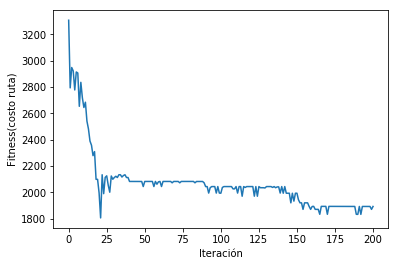

In [6]:
import dominio_ag_tsp
import matplotlib.pyplot as plt
from random import seed

def __graficar(datos):
    xs = datos['Iteraciones']
    ys = datos['Fitness(costo ruta)']
    plt.plot(xs, ys)
    plt.ylabel('Fitness(costo ruta)')
    plt.xlabel('Iteración')
    plt.show()

dominio_pruebas = dominio_ag_tsp.DominioAGTSP("datos/ciudades_cr.csv","Liberia")
poblacion, datos = optimizar_concurrente(dominio_pruebas,100,0.1,0.1,200, data = True, Hilo = False)
__graficar(datos)

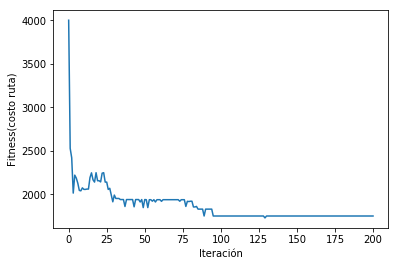

In [9]:
poblacion, datos = optimizar_concurrente(dominio_pruebas,100,0.1,0.1,200, data = True, Hilo = True)
__graficar(datos)

## Referencias

Colmenarez, S. (2011, August 5). Algoritmo Secuenciales. Share and Discover Knowledge on SlideShare. https://www.slideshare.net/SlimsColmenarez/algoritmo-secuenciales

Rance, R., & Smolka, S et al. (2020, March 16). Concurrencia (informatica). Wikipedia, la enciclopedia libre. Retrieved August 12, 2020, from https://es.wikipedia.org/wiki/Concurrencia_(inform%C3%A1tica)